In [6]:
import torch
import seaborn as sns

from windmark.core.structs import Hyperparameters
from windmark.core.architecture import smoothen

<Axes: >

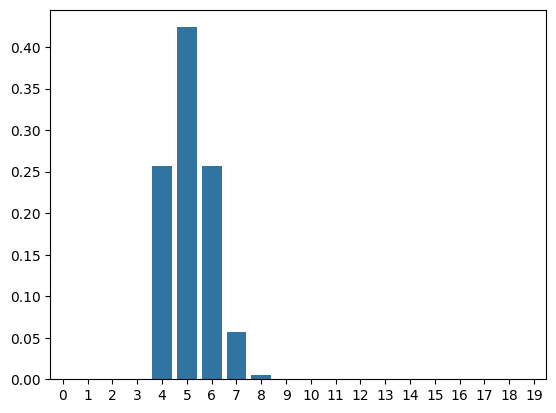

In [5]:
tensor = torch.tensor([[5]])

Q = 16
T = 4

params = Hyperparameters(batch_size=1, n_context=1, n_quantiles=Q, quantile_smoothing=1.0)

targets = smoothen(targets=tensor, params=params).squeeze(0, 1)

sns.barplot(targets.numpy())